`GRIP-The Sparks Foundation`

`Data Science and Business Analytics Intern`

`Author: Azmat Sohal`

`Prediction using Unsupervised ML`

`From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.` 


`Importing the required libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#reading data using pandas
data=pd.read_csv('iris.csv')

In [3]:
#first 5 rows of data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#rows and columns of data
data.shape

(150, 6)

In [5]:
#describing the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#checking data types
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
#checking for any null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#dropping Id as it is not required for prediction
data=data.drop(['Id'], axis=1)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


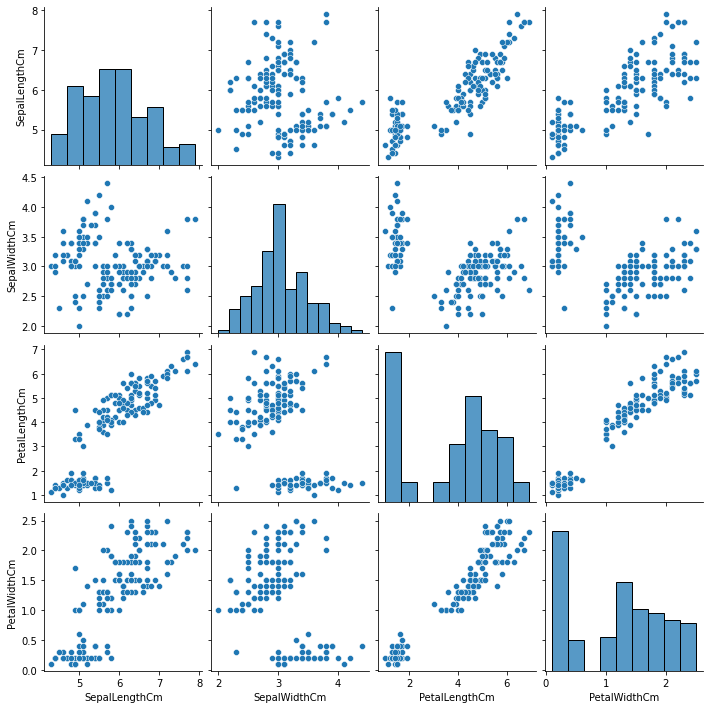

In [10]:
#pairplot for checking relationship between features
sns.pairplot(data)

`Finding optimum number of clusters`

In [13]:
#kmeans to find optimum number of clusters
x1=data.iloc[:,[0,1,2,3]].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
    

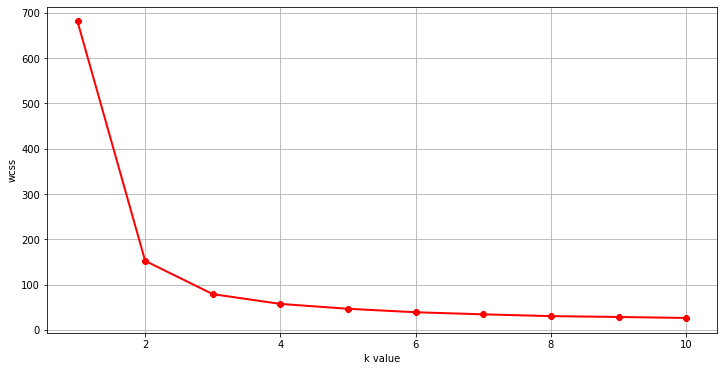

In [14]:
#plotting the graph
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [15]:
#prediction using number of clusters as 3
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(x1)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [16]:
#checking for cluster centers
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


` Data Visualization`

Text(0, 0.5, 'sepalwidth')

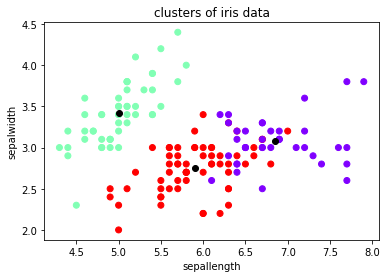

In [26]:
#clusters using sepallength and sepalwidth
plt.scatter(x1[:,0],x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('clusters of iris data')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')

Text(0, 0.5, 'petalwidth')

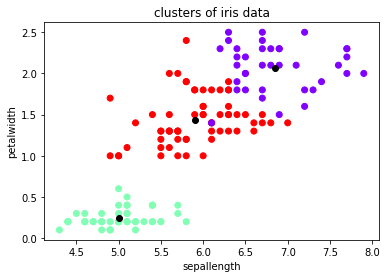

In [50]:
#clusters using sepal_length and petal_length
plt.scatter(x1[:,0],x1[:,3], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], color='black')
plt.title('clusters of iris data')
plt.xlabel('sepallength')
plt.ylabel('petalwidth')


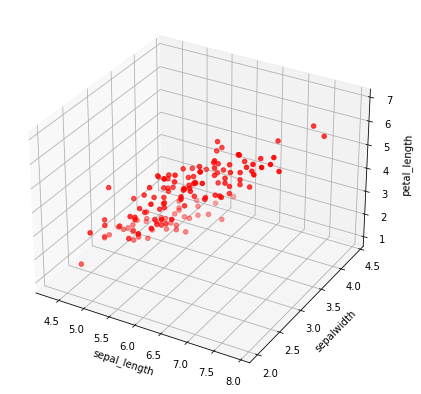

In [49]:
# 3D projection of clusters 
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.scatter3D(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'], c='red')
plt.xlabel('sepal_length')
plt.ylabel('sepalwidth')
ax.set_zlabel('petal_length')
plt.show()

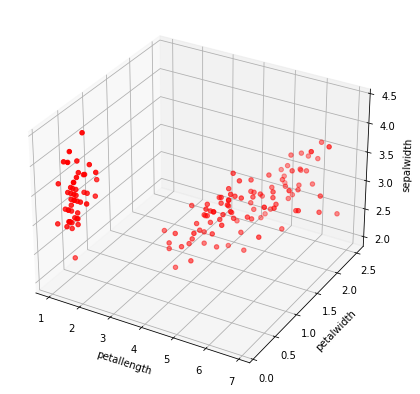

In [51]:
# 3D projection of clusters 
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.scatter3D(data['PetalLengthCm'],data['PetalWidthCm'],data['SepalWidthCm'] ,c='red')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
ax.set_zlabel('sepalwidth')
plt.show()

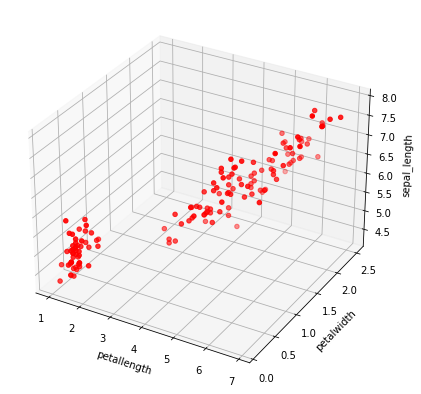

In [48]:
# 3D projection of clusters 
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.scatter3D(data['PetalLengthCm'],data['PetalWidthCm'],data['SepalLengthCm'] ,c='red')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
ax.set_zlabel('sepal_length')
plt.show()

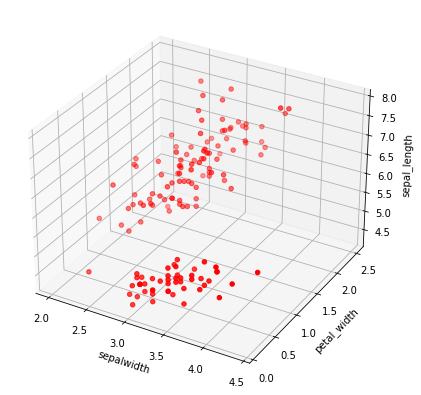

In [47]:
# 3D projection of clusters 
from mpl_toolkits import mplot3d

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')
ax.scatter3D(data['SepalWidthCm'],data['PetalWidthCm'],data['SepalLengthCm'],c='red')
plt.xlabel('sepalwidth')
plt.ylabel('petal_width')
ax.set_zlabel('sepal_length')
plt.show()

`RESULT:`

`The optimum number of clusters is 3`